# Carregando Bibliotecas

In [4]:
# Importação brbliotecas necessárias

import pandas as pd
import numpy as np
import os # para o retorno do caminho dos dados - 'os.chdir'
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gc

# Contruindo Funções

In [5]:
# Função que cria variável "estacao_ano" para identificar as estações climáticas
# A função "calcula_estacao_ano" a seguir foi obtida através do link abaixo

# https://elibrary.tips/em-python-as-quatro-estaoes-do-ano-variam-de-acordo-com-as-datas-primavera-2.html


def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month

  if vmes in (1,2):
    return "Verão"
  elif vmes == 3:
    if vdia < 21:
      return "Verão"
    else:
      return "Outono"
  elif vmes in (4,5):
      return "Outono"
  elif vmes == 6:
      if vdia < 21:
        return "Outono"
      else:
        return "Inverno"
  elif vmes in (7,8):
      return "Inverno"
  elif vmes == 9:
      if vdia < 21:
        return "Inverno"
      else:
        return "Primavera"
  elif vmes in (10,11):
      return "Primavera"
  elif vmes == 12:
      if vdia < 21:
        return "Primavera"
      else:
        return "Verão"


# Função que cria a variável num com valores numéricos para as estações do ano

def calcula_num_estcao_ano(estacao):
    vestacao = estacao

    if vestacao == 'Outono':
      return 1
    elif vestacao == 'Inverno':
      return 2
    elif vestacao == 'Primavera':
      return 3
    else:
      return 4


# Função que cria a variável Nmes com os períodos do dia em função da hora

def calcula_periodo_dia(hora):
    vhora = hora

    if vhora in (0,1,2,3,4,5,6):
      return "Madrugada"
    elif vhora in (7,8,9,10,11,12):
      return "Manhã"
    elif vhora in (13,14,15,16,17,18):
      return "Tarde"
    else:
      return "Noite"

# Função que cria a variável Nmes com os nomes dos meses do ano

def calcula_nome_mes(mes):
  vmes = mes

  if mes == 1:
    return "Janeiro"
  elif mes == 2:
    return "Fevereiro"
  elif mes == 3:
    return "Março"
  elif mes == 4:
    return "Abril"
  elif mes == 5:
    return "Maio"
  elif mes == 6:
    return "Junho"
  elif mes == 7:
    return "Julho"
  elif mes == 8:
    return "Agosto"
  elif mes == 9:
    return "Setembro"
  elif mes == 10:
    return "Outubro"
  elif mes == 11:
    return "Novembro"
  else:
    return "Dezembro"


def classificaidade(idade):
   vidade = idade

   if vidade < 10:
     return "Criança"
   elif (vidade > 9) and (vidade < 20):
     return "Adolescente"
   elif (vidade > 19) and (vidade < 60):
     return "Adulto"
   else:
     return "Idoso"



def adicionar_valores_nas_barras(ax,
                                  formato="{:.1f}%",
                                  espaco=0.1,
                                  cor='black',
                                  fontsize=8,
                                  dentro=False,
                                  orientacao='v'):
    """
    Adiciona rótulos com os valores nas barras de um gráfico seaborn (vertical ou horizontal).

    Parâmetros:
    - ax: objeto Axes retornado por sns.barplot
    - formato: string de formatação (ex: "{:.1f}%")
    - espaco: espaço entre barra e texto (positivo = fora, negativo = dentro)
    - cor: cor do texto
    - fontsize: tamanho da fonte
    - dentro: se True, posiciona o texto dentro da barra
    - orientacao: 'v' para gráfico vertical (barras pra cima), 'h' para horizontal
    """
    for bar in ax.patches:
        if orientacao == 'v':
            altura = bar.get_height()
            y = altura - espaco if dentro else altura + espaco
            va = 'top' if dentro else 'bottom'
            x = bar.get_x() + bar.get_width() / 2
            ax.text(x, y, formato.format(altura),
                    ha='center', va=va, color=cor, fontsize=fontsize)
        elif orientacao == 'h':
            largura = bar.get_width()
            x = largura - espaco if dentro else largura + espaco
            ha = 'right' if dentro else 'left'
            y = bar.get_y() + bar.get_height() / 2
            ax.text(x, y, formato.format(largura),
                    ha=ha, va='center', color=cor, fontsize=fontsize)


## Criando Funções

# Montando Drive e Carregando dados

In [6]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [7]:
# Importando o arquivo em formato csv hospedado em My Drive
# Verificando se o arquivo existe no caminho especificado
file_path = 'dados/bdaih20172023ano.csv'
if os.path.exists(file_path):
  dadoInternacao = pd.read_csv(file_path, delimiter =';')
else:
  print(f"Erro: Arquivo não encontrado em: {file_path}")
  print("Verifique se o arquivo existe e o caminho está correto.")

In [8]:
dadoInternacao

,INDEX,ID,D_INTER,D_INTER_DATA,anomonit,mesmonit,diamonit,Fxetaria,Q_IDADE,NOME_SEXO,N_CEP,C_DIAGPRIN,grupo,NOME_ATEND,C_MUNICRES,LATITUDE,LONGITUDE
0,1,1,20161026,2016-10-26,2016,10,26,80anosoumais,81,Masculino,21930380,I618,I,Urgência,330455,"-22,816156","-43,181981"
1,2,2,20160920,2016-09-20,2016,9,20,de65a69anos,66,Feminino,22753020,I443,I,Urgência,330455,"-22,988923","-43,311472"
2,3,3,20160902,2016-09-02,2016,9,2,de60a64anos,62,Feminino,21050090,I208,I,Urgência,330455,"-22,87706","-43,253682"
3,4,4,20160811,2016-08-11,2016,8,11,de25a29anos,27,Masculino,20771610,J189,J,Urgência,330455,"-22,882181","-43,276965"
4,5,5,20161001,2016-10-01,2016,10,1,80anosoumais,80,Feminino,23555012,I638,I,Urgência,330455,"-22,915152","-43,686201"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141105,141106,25454,20231129,2023-11-29,2023,11,29,de50a54anos,54,Masculino,21371430,I64,I,Urgência,330455,"-22,858013","-43,314833"
141106,141107,25455,20231222,2023-12-22,2023,12,22,de40a44anos,40,Feminino,21555170,I64,I,Urgência,330455,"-22,85443","-43,35828"
141107,141108,25456,20231216,2023-12-16,2023,12,16,de60a64anos,64,Feminino,21230355,I64,I,Urgência,330455,"-22,826665","-43,315918"
141108,141109,25457,20231212,2023-12-12,2023,12,12,de1a4anos,1,Feminino,21241310,J189,J,Urgência,330455,"-22,809014","-43,308034"


In [9]:
dadoInternacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141110 entries, 0 to 141109
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   INDEX         141110 non-null  int64 
 1   ID            141110 non-null  int64 
 2   D_INTER       141110 non-null  int64 
 3   D_INTER_DATA  141110 non-null  object
 4   anomonit      141110 non-null  int64 
 5   mesmonit      141110 non-null  int64 
 6   diamonit      141110 non-null  int64 
 7   Fxetaria      141110 non-null  object
 8   Q_IDADE       141110 non-null  int64 
 9   NOME_SEXO     141110 non-null  object
 10  N_CEP         141110 non-null  int64 
 11  C_DIAGPRIN    141110 non-null  object
 12  grupo         141110 non-null  object
 13  NOME_ATEND    141110 non-null  object
 14  C_MUNICRES    141110 non-null  int64 
 15  LATITUDE      141110 non-null  object
 16  LONGITUDE     141110 non-null  object
dtypes: int64(9), object(8)
memory usage: 18.3+ MB


# Tratamento de dados

In [10]:
# Alterando o atributo D_INTER_DATA de object para formato date

dadoInternacao['D_INTER_DATA'] = pd.to_datetime(dadoInternacao['D_INTER_DATA'])

In [11]:
# Alterando o atributo Data de object para formato date e Inserindo atributos relacionados aos períodos do ano

dadoInternacao['Ano'] = dadoInternacao['D_INTER_DATA'].dt.year
dadoInternacao['Mes'] = dadoInternacao['D_INTER_DATA'].dt.month
dadoInternacao['Dia'] = dadoInternacao['D_INTER_DATA'].dt.day
dadoInternacao['D_INTER_DATA'] = pd.to_datetime(dadoInternacao['D_INTER_DATA'])

In [12]:
# Criando a variável "estacao_ano" para identificar as estações climáticas

dadoInternacao["estacao_ano"] = dadoInternacao["D_INTER_DATA"].apply(calcula_estacao_ano)

In [13]:
# Criando a variável "nmes" dando nome aos meses dos anos

dadoInternacao["nmes"] = dadoInternacao["Mes"].apply(calcula_nome_mes)

Segundo a Organização Mundial da Saúde (OMS), as faixas etárias são classificadas da seguinte maneira:



*   Criança: 0 a 9 anos
*   Adolescente: 10 a 19 anos
*   Adulto: 20 a 59 anos
*   Idoso: 60 anos ou mais

In [14]:
# Criando a variável "classifidade" dando nome aos grupos etários

dadoInternacao["classifidade"] = dadoInternacao["Q_IDADE"].apply(classificaidade)

In [15]:
dadoInternacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141110 entries, 0 to 141109
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INDEX         141110 non-null  int64         
 1   ID            141110 non-null  int64         
 2   D_INTER       141110 non-null  int64         
 3   D_INTER_DATA  141110 non-null  datetime64[ns]
 4   anomonit      141110 non-null  int64         
 5   mesmonit      141110 non-null  int64         
 6   diamonit      141110 non-null  int64         
 7   Fxetaria      141110 non-null  object        
 8   Q_IDADE       141110 non-null  int64         
 9   NOME_SEXO     141110 non-null  object        
 10  N_CEP         141110 non-null  int64         
 11  C_DIAGPRIN    141110 non-null  object        
 12  grupo         141110 non-null  object        
 13  NOME_ATEND    141110 non-null  object        
 14  C_MUNICRES    141110 non-null  int64         
 15  LATITUDE      141

In [16]:
# Comando pd.set_option permite aumentar a quantidade de colunas apresentadas
pd.set_option('display.max_columns', None)
dadoInternacao

,INDEX,ID,D_INTER,D_INTER_DATA,anomonit,mesmonit,diamonit,Fxetaria,Q_IDADE,NOME_SEXO,N_CEP,C_DIAGPRIN,grupo,NOME_ATEND,C_MUNICRES,LATITUDE,LONGITUDE,Ano,Mes,Dia,estacao_ano,nmes,classifidade
0,1,1,20161026,2016-10-26,2016,10,26,80anosoumais,81,Masculino,21930380,I618,I,Urgência,330455,"-22,816156","-43,181981",2016,10,26,Primavera,Outubro,Idoso
1,2,2,20160920,2016-09-20,2016,9,20,de65a69anos,66,Feminino,22753020,I443,I,Urgência,330455,"-22,988923","-43,311472",2016,9,20,Inverno,Setembro,Idoso
2,3,3,20160902,2016-09-02,2016,9,2,de60a64anos,62,Feminino,21050090,I208,I,Urgência,330455,"-22,87706","-43,253682",2016,9,2,Inverno,Setembro,Idoso
3,4,4,20160811,2016-08-11,2016,8,11,de25a29anos,27,Masculino,20771610,J189,J,Urgência,330455,"-22,882181","-43,276965",2016,8,11,Inverno,Agosto,Adulto
4,5,5,20161001,2016-10-01,2016,10,1,80anosoumais,80,Feminino,23555012,I638,I,Urgência,330455,"-22,915152","-43,686201",2016,10,1,Primavera,Outubro,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141105,141106,25454,20231129,2023-11-29,2023,11,29,de50a54anos,54,Masculino,21371430,I64,I,Urgência,330455,"-22,858013","-43,314833",2023,11,29,Primavera,Novembro,Adulto
141106,141107,25455,20231222,2023-12-22,2023,12,22,de40a44anos,40,Feminino,21555170,I64,I,Urgência,330455,"-22,85443","-43,35828",2023,12,22,Verão,Dezembro,Adulto
141107,141108,25456,20231216,2023-12-16,2023,12,16,de60a64anos,64,Feminino,21230355,I64,I,Urgência,330455,"-22,826665","-43,315918",2023,12,16,Primavera,Dezembro,Idoso
141108,141109,25457,20231212,2023-12-12,2023,12,12,de1a4anos,1,Feminino,21241310,J189,J,Urgência,330455,"-22,809014","-43,308034",2023,12,12,Primavera,Dezembro,Criança


In [17]:
#caminho_saida_tabela = f"OUTPUT/tabela.xlsx"

# Create the directory if it doesn't exist
#os.makedirs(os.path.dirname(caminho_saida_tabela), exist_ok=True)

# Salvando a tabela final
#dadoInternacao.to_excel(caminho_saida_tabela, index=False)

# Análise descritiva

In [18]:
# Selecionando variáveis no dadoIntercacao

df_dadoInternacao_histograma = dadoInternacao[['Ano','nmes','estacao_ano','classifidade','Fxetaria','C_DIAGPRIN']]

In [19]:
df_dadoInternacao_histograma

,Ano,nmes,estacao_ano,classifidade,Fxetaria,C_DIAGPRIN
0,2016,Outubro,Primavera,Idoso,80anosoumais,I618
1,2016,Setembro,Inverno,Idoso,de65a69anos,I443
2,2016,Setembro,Inverno,Idoso,de60a64anos,I208
3,2016,Agosto,Inverno,Adulto,de25a29anos,J189
4,2016,Outubro,Primavera,Idoso,80anosoumais,I638
...,...,...,...,...,...,...
141105,2023,Novembro,Primavera,Adulto,de50a54anos,I64
141106,2023,Dezembro,Verão,Adulto,de40a44anos,I64
141107,2023,Dezembro,Primavera,Idoso,de60a64anos,I64
141108,2023,Dezembro,Primavera,Criança,de1a4anos,J189


## 1 - Faixa Etária





In [20]:
# Agrupar por faixa etária e contar
df_faixaetaria = df_dadoInternacao_histograma.groupby('Fxetaria').size().reset_index(name='totFxetaria')

# Calcular percentual
total_geral = df_faixaetaria['totFxetaria'].sum()
df_faixaetaria['percFxetaria'] = (df_faixaetaria['totFxetaria'] / total_geral) * 100

# Opcional: ordenar pelas faixas etárias
df_faixaetaria = df_faixaetaria.sort_values('percFxetaria')

# Transformar 'Fxetaria' em categoria ordenada
df_faixaetaria['percFxetaria'] = pd.Categorical(df_faixaetaria['percFxetaria'], categories=df_faixaetaria['percFxetaria'])

In [21]:
df_faixaetaria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 3 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Fxetaria      18 non-null     object  
 1   totFxetaria   18 non-null     int64   
 2   percFxetaria  18 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1.1+ KB


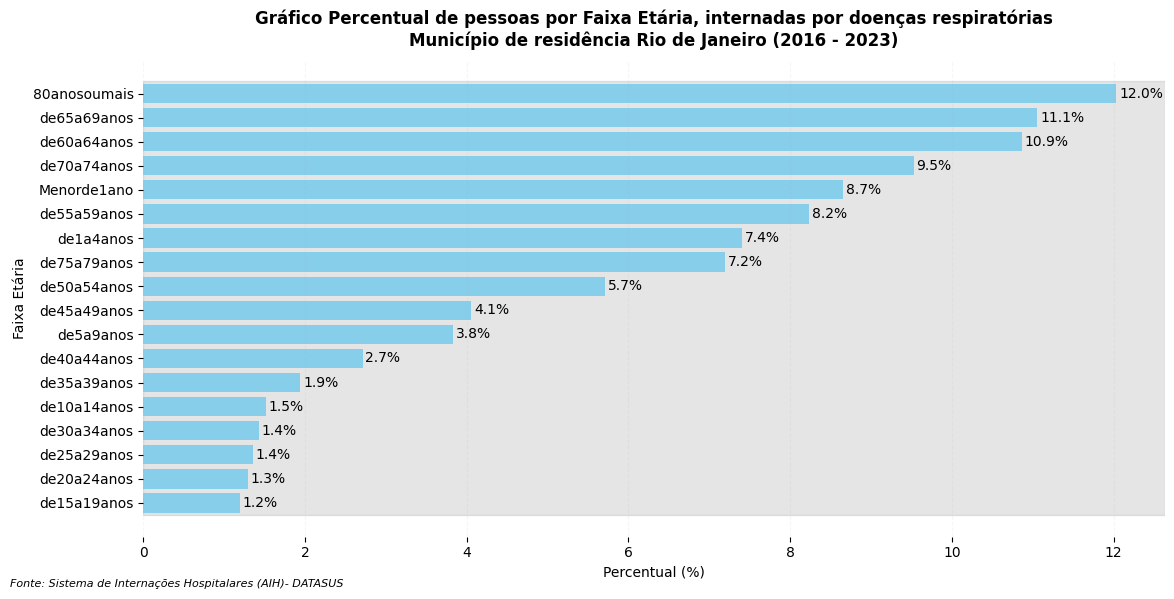

In [22]:
## Gráfico1 - Faixa Etária

# Ordenar os dados
df_faixaetaria_ordenado = df_faixaetaria.sort_values(by="percFxetaria", ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(left=0.45, right=0.95, bottom=0.15, top=0.85)

# Inverter a ordem do eixo Y
ax.invert_yaxis()

# Adicionar uma sombra de fundo
ax.axhspan(- 0.5, len(df_faixaetaria_ordenado) - 0.5, color='gray', alpha=0.2)

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Barras horizontais
bars = ax.barh(
    df_faixaetaria_ordenado['Fxetaria'],
    df_faixaetaria_ordenado['percFxetaria'],
    color='skyblue'
)

# Adicionar rótulos
ax.bar_label(
    bars,
    labels=[f'{p:.1f}%' for p in df_faixaetaria_ordenado['percFxetaria']],
    padding=2,
    label_type='edge'
)

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de pessoas por Faixa Etária, internadas por doenças respiratórias\nMunicípio de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)

# Adicionar fonte
fig.text(
    0.01, 0.01,
    'Fonte: Sistema de Internações Hospitalares (AIH)- DATASUS',
    ha='left',
    va='bottom',
    fontsize=8,
    style='italic'
)

# Personalização
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('Faixa Etária')
#ax.set_title('Gráfico Percentual de pessoas por Faixa Etária, internadas por doenças respiratórias\nMunicípio de residência Rio de Janeiro (2016 - 2023)')
ax.grid(axis='x', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

In [23]:
# Exclui o dataset original (que não será mais usado)
del df_faixaetaria_ordenado
del df_faixaetaria
gc.collect()  # Libera memória

39

## 2 - Classificação da Idade

In [24]:
# Agrupar por classificação etária e contar
df_classifidade = df_dadoInternacao_histograma.groupby('classifidade').size().reset_index(name='totClassIdade')

# Calcular percentual
total_geral = df_classifidade['totClassIdade'].sum()
df_classifidade['percClassIdade'] = (df_classifidade['totClassIdade'] / total_geral) * 100

In [25]:
df_classifidade

,classifidade,totClassIdade,percClassIdade
0,Adolescente,3819,2.706399
1,Adulto,37707,26.721706
2,Criança,28074,19.895117
3,Idoso,71510,50.676777


In [26]:
df_classifidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   classifidade    4 non-null      object 
 1   totClassIdade   4 non-null      int64  
 2   percClassIdade  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


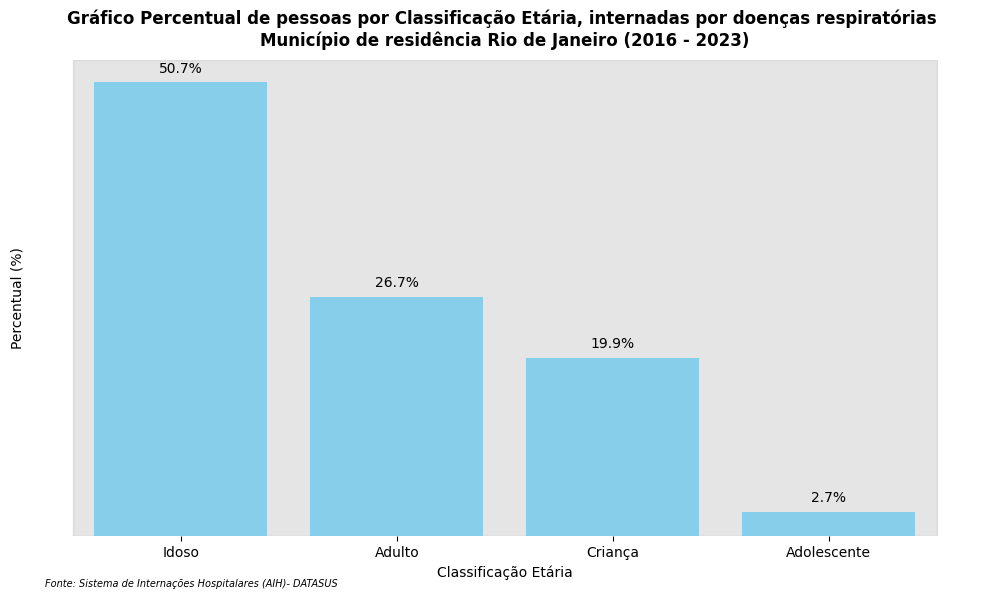

In [27]:
# Ordenar os dados se necessário
df_classifidade = df_classifidade.sort_values(by="percClassIdade", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Barras verticais (formato corrigido)
bars = ax.bar(
    df_classifidade['classifidade'],
    df_classifidade['percClassIdade'],
    color='skyblue')

# Adicionar rótulos nas barras
ax.bar_label(
    bars,
    labels=[f'{p:.1f}%' for p in df_classifidade['percClassIdade']],
    padding=5,
    label_type='edge'
)

# Remover os valores (ticks) do eixo Y
ax.set_yticks([])  # Isso remove os números do eixo Y


# Adicionar uma sombra de fundo (agora usando axvspan para área vertical)
ax.axvspan(-0.5, len(df_classifidade) - 0.5, color='gray', alpha=0.2, zorder=0)

# Personalização
ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Classificação Etária')

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de pessoas por Classificação Etária, internadas por doenças respiratórias \nMunicípio de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)


# Adicionar fonte
fig.text(
    0.05, 0.01,
    'Fonte: Sistema de Internações Hospitalares (AIH)- DATASUS',
    ha='left',
    va='bottom',
    fontsize=7,
    style='italic'
)


# Grid e layout
ax.grid(axis='y', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

In [28]:
# Exclui o dataset original (que não será mais usado)
del df_classifidade
gc.collect()  # Libera memória

26

### 2.1 - Classificação Idade x Estação do Ano

#### Idoso x Estação do Ano


In [29]:
# Filtrar apenas os idosos
df_IdadeIdoso = df_dadoInternacao_histograma[df_dadoInternacao_histograma['classifidade'] == 'Idoso']

# Agrupar por Fxetaria e estacao_ano e contar ocorrências
df_idosoestacao = df_IdadeIdoso.groupby(['Fxetaria', 'estacao_ano']).size().reset_index(name='totClassIdade')

# Calcular o total POR FAIXA ETÁRIA (Fxetaria) em vez do total geral
df_idosoestacao['total_por_faixa'] = df_idosoestacao.groupby('Fxetaria')['totClassIdade'].transform('sum')

# Calcular o percentual DENTRO de cada faixa etária
df_idosoestacao['percClassIdade'] = (df_idosoestacao['totClassIdade'] / df_idosoestacao['total_por_faixa']) * 100

# Ordenar (opcional)
df_idosoestacao = df_idosoestacao.sort_values(['Fxetaria', 'totClassIdade'], ascending=[True, False])

In [30]:
df_IdadeIdoso

,Ano,nmes,estacao_ano,classifidade,Fxetaria,C_DIAGPRIN
0,2016,Outubro,Primavera,Idoso,80anosoumais,I618
1,2016,Setembro,Inverno,Idoso,de65a69anos,I443
2,2016,Setembro,Inverno,Idoso,de60a64anos,I208
4,2016,Outubro,Primavera,Idoso,80anosoumais,I638
5,2016,Dezembro,Primavera,Idoso,de60a64anos,I214
...,...,...,...,...,...,...
141099,2023,Dezembro,Primavera,Idoso,de70a74anos,I64
141100,2023,Dezembro,Primavera,Idoso,de65a69anos,J189
141101,2023,Dezembro,Primavera,Idoso,80anosoumais,J189
141103,2023,Dezembro,Primavera,Idoso,80anosoumais,I64


In [31]:
df_idosoestacao

,Fxetaria,estacao_ano,totClassIdade,total_por_faixa,percClassIdade
0,80anosoumais,Inverno,4703,16979,27.698922
2,80anosoumais,Primavera,4249,16979,25.025031
1,80anosoumais,Outono,4162,16979,24.512633
3,80anosoumais,Verão,3865,16979,22.763414
4,de60a64anos,Inverno,4226,15328,27.570459
6,de60a64anos,Primavera,3812,15328,24.869520
7,de60a64anos,Verão,3651,15328,23.819154
5,de60a64anos,Outono,3639,15328,23.740866
8,de65a69anos,Inverno,4187,15602,26.836303
10,de65a69anos,Primavera,4109,15602,26.336367


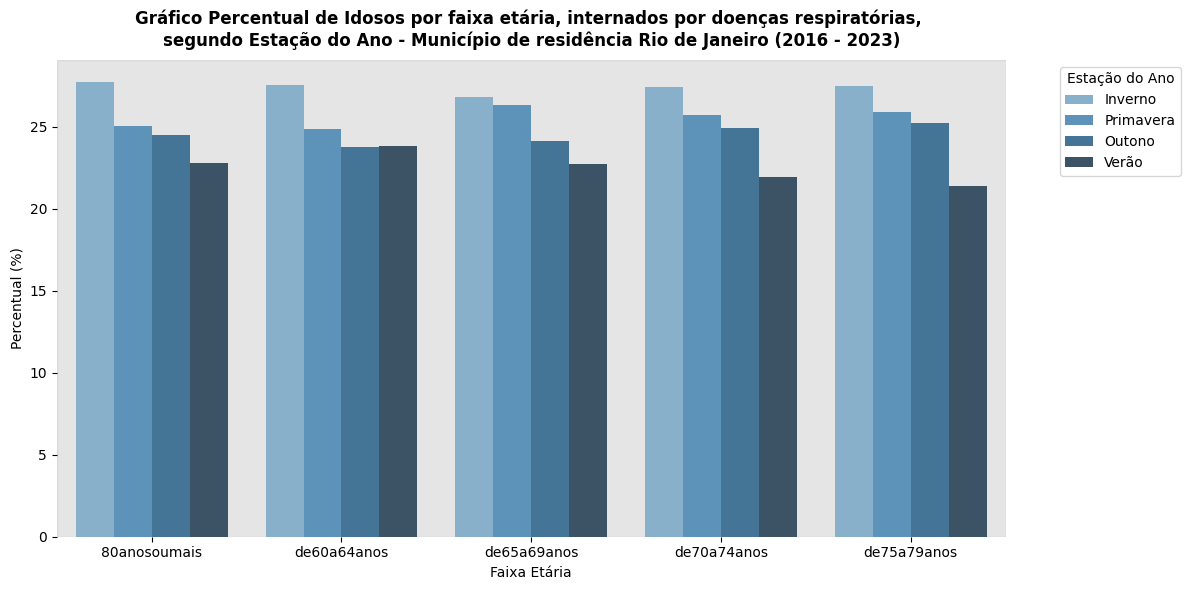

In [32]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtém o eixo atual

# Adiciona a sombra de fundo PRIMEIRO (zorder baixo)
ax.axvspan(
    -0.5,
    len(df_idosoestacao['Fxetaria'].unique()) - 0.5,
    ymin=0,  # Começa na base do eixo Y
    ymax=1,  # Vai até o topo do eixo Y
    color='gray',
    alpha=0.2,
    zorder=0
)

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Plotar o gráfico de barras (zorder mais alto)
sns.barplot(
    data=df_idosoestacao,
    x='Fxetaria',
    y='percClassIdade',
    hue='estacao_ano',
    palette='Blues_d',
    ax=ax,  # Usa o eixo criado
    zorder=10  # Garante que as barras fiquem na frente
)

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de Idosos por faixa etária, internados por doenças respiratórias, \nsegundo Estação do Ano - Município de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)

# Personalização
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.legend(title='Estação do Ano', bbox_to_anchor=(1.05, 1))
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
# Exclui o dataset original (que não será mais usado)
del df_IdadeIdoso
del df_idosoestacao
gc.collect()  # Libera memória

5784

#### Criança x Estação do Ano

In [34]:
# Filtrar apenas crianças
df_IdadeCrianca = df_dadoInternacao_histograma[df_dadoInternacao_histograma['classifidade'] == 'Criança']

# Agrupar por Fxetaria e estacao_ano e contar ocorrências
df_criancaestacao = df_IdadeCrianca.groupby(['Fxetaria', 'estacao_ano']).size().reset_index(name='totClassIdade')

# Calcular o total POR FAIXA ETÁRIA (Fxetaria) em vez do total geral
df_criancaestacao['total_por_faixa'] = df_criancaestacao.groupby('Fxetaria')['totClassIdade'].transform('sum')

# Calcular o percentual DENTRO de cada faixa etária
df_criancaestacao['percClassIdade'] = (df_criancaestacao['totClassIdade'] / df_criancaestacao['total_por_faixa']) * 100

# Ordenar (opcional)
df_criancaestacao = df_criancaestacao.sort_values(['Fxetaria', 'totClassIdade'], ascending=[True, False])

In [35]:
df_criancaestacao

,Fxetaria,estacao_ano,totClassIdade,total_por_faixa,percClassIdade
1,Menorde1ano,Outono,4775,12218,39.081683
0,Menorde1ano,Inverno,2884,12218,23.604518
2,Menorde1ano,Primavera,2621,12218,21.451956
3,Menorde1ano,Verão,1938,12218,15.861843
5,de1a4anos,Outono,3231,10453,30.909787
4,de1a4anos,Inverno,2721,10453,26.030805
6,de1a4anos,Primavera,2424,10453,23.189515
7,de1a4anos,Verão,2077,10453,19.869894
8,de5a9anos,Inverno,1569,5403,29.039423
10,de5a9anos,Primavera,1392,5403,25.763465


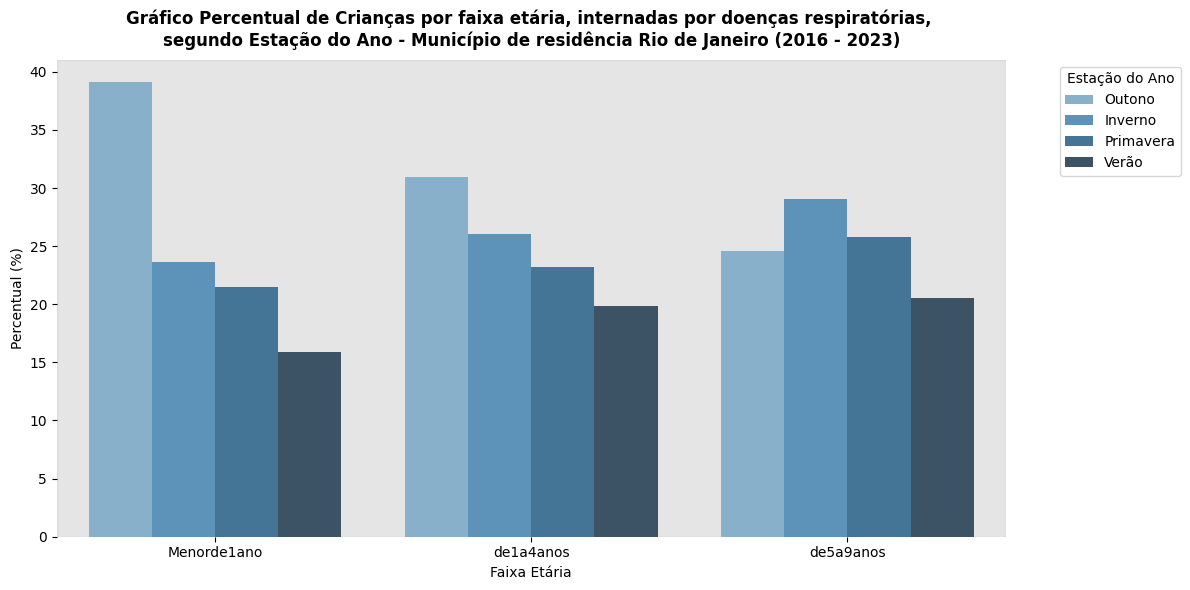

In [36]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtém o eixo atual

# Adiciona a sombra de fundo PRIMEIRO (zorder baixo)
ax.axvspan(
    -0.5,
    len(df_criancaestacao['Fxetaria'].unique()) - 0.5,
    ymin=0,  # Começa na base do eixo Y
    ymax=1,  # Vai até o topo do eixo Y
    color='gray',
    alpha=0.2,
    zorder=0
)

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Plotar o gráfico de barras (zorder mais alto)
sns.barplot(
    data=df_criancaestacao,
    x='Fxetaria',
    y='percClassIdade',
    hue='estacao_ano',
    palette='Blues_d',
    ax=ax,  # Usa o eixo criado
    zorder=10  # Garante que as barras fiquem na frente
)

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de Crianças por faixa etária, internadas por doenças respiratórias, \nsegundo Estação do Ano - Município de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)

# Personalização
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.legend(title='Estação do Ano', bbox_to_anchor=(1.05, 1))
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
# Exclui o dataset original (que não será mais usado)
del df_IdadeCrianca
del df_criancaestacao
gc.collect()  # Libera memória

6247

#### Adulto x Estação do Ano

In [38]:
# Filtrar apenas adultos
df_IdadeAdulto = df_dadoInternacao_histograma[df_dadoInternacao_histograma['classifidade'] == 'Adulto']

# Agrupar por Fxetaria e estacao_ano e contar ocorrências
df_adultoestacao = df_IdadeAdulto.groupby(['Fxetaria', 'estacao_ano']).size().reset_index(name='totClassIdade')

# Calcular o total POR FAIXA ETÁRIA (Fxetaria) em vez do total geral
df_adultoestacao['total_por_faixa'] = df_adultoestacao.groupby('Fxetaria')['totClassIdade'].transform('sum')

# Calcular o percentual DENTRO de cada faixa etária
df_adultoestacao['percClassIdade'] = (df_adultoestacao['totClassIdade'] / df_adultoestacao['total_por_faixa']) * 100

# Ordenar (opcional)
df_adultoestacao = df_adultoestacao.sort_values(['Fxetaria', 'totClassIdade'], ascending=[True, False])

In [39]:
df_adultoestacao

,Fxetaria,estacao_ano,totClassIdade,total_por_faixa,percClassIdade
2,de20a24anos,Primavera,490,1820,26.923077
0,de20a24anos,Inverno,464,1820,25.494505
3,de20a24anos,Verão,434,1820,23.846154
1,de20a24anos,Outono,432,1820,23.736264
4,de25a29anos,Inverno,528,1907,27.687467
6,de25a29anos,Primavera,501,1907,26.271631
5,de25a29anos,Outono,466,1907,24.436287
7,de25a29anos,Verão,412,1907,21.604615
8,de30a34anos,Inverno,533,2014,26.464747
10,de30a34anos,Primavera,529,2014,26.266137


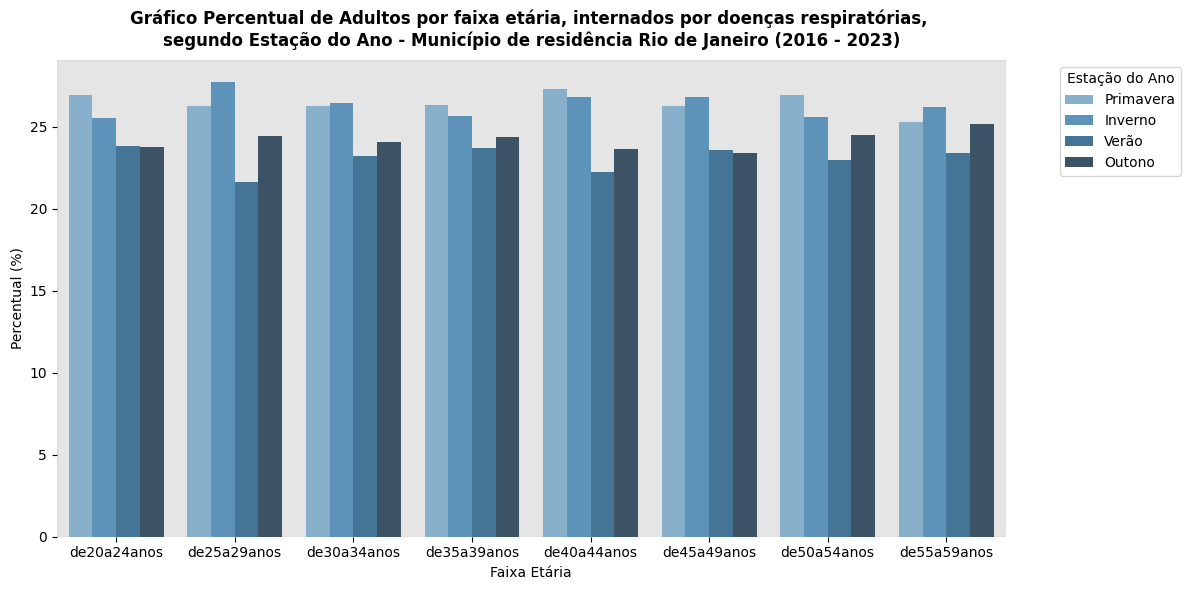

In [40]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtém o eixo atual

# Adiciona a sombra de fundo PRIMEIRO (zorder baixo)
ax.axvspan(
    -0.5,
    len(df_adultoestacao['Fxetaria'].unique()) - 0.5,
    ymin=0,  # Começa na base do eixo Y
    ymax=1,  # Vai até o topo do eixo Y
    color='gray',
    alpha=0.2,
    zorder=0
)

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Plotar o gráfico de barras (zorder mais alto)
sns.barplot(
    data=df_adultoestacao,
    x='Fxetaria',
    y='percClassIdade',
    hue='estacao_ano',
    palette='Blues_d',
    ax=ax,  # Usa o eixo criado
    zorder=10  # Garante que as barras fiquem na frente
)

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de Adultos por faixa etária, internados por doenças respiratórias, \nsegundo Estação do Ano - Município de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)

# Personalização
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.legend(title='Estação do Ano', bbox_to_anchor=(1.05, 1))
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# Exclui o dataset original (que não será mais usado)
del df_IdadeAdulto
del df_adultoestacao
gc.collect()  # Libera memória

5434

#### Adolescente x Estação do Ano

In [42]:
# Filtrar apenas adolescentes
df_IdadeAdolescente = df_dadoInternacao_histograma[df_dadoInternacao_histograma['classifidade'] == 'Adolescente']

# Agrupar por Fxetaria e estacao_ano e contar ocorrências
df_adolescenteestacao = df_IdadeAdolescente.groupby(['Fxetaria', 'estacao_ano']).size().reset_index(name='totClassIdade')

# Calcular o total POR FAIXA ETÁRIA (Fxetaria) em vez do total geral
df_adolescenteestacao['total_por_faixa'] = df_adolescenteestacao.groupby('Fxetaria')['totClassIdade'].transform('sum')

# Calcular o percentual DENTRO de cada faixa etária
df_adolescenteestacao['percClassIdade'] = (df_adolescenteestacao['totClassIdade'] / df_adolescenteestacao['total_por_faixa']) * 100

# Ordenar (opcional)
df_adolescenteestacao = df_adolescenteestacao.sort_values(['Fxetaria', 'totClassIdade'], ascending=[True, False])

In [43]:
df_adolescenteestacao

,Fxetaria,estacao_ano,totClassIdade,total_por_faixa,percClassIdade
0,de10a14anos,Inverno,630,2137,29.480580
1,de10a14anos,Outono,546,2137,25.549836
2,de10a14anos,Primavera,516,2137,24.145999
3,de10a14anos,Verão,445,2137,20.823584
6,de15a19anos,Primavera,463,1682,27.526754
4,de15a19anos,Inverno,441,1682,26.218787
7,de15a19anos,Verão,390,1682,23.186683
5,de15a19anos,Outono,388,1682,23.067776


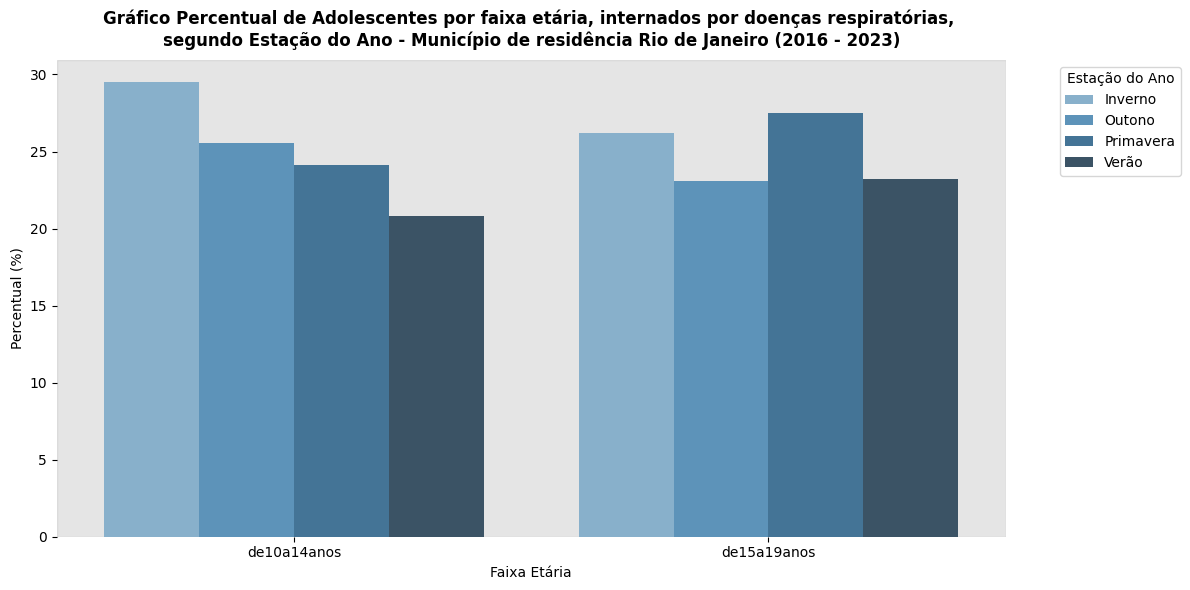

In [44]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtém o eixo atual

# Adiciona a sombra de fundo PRIMEIRO (zorder baixo)
ax.axvspan(
    -0.5,
    len(df_adolescenteestacao['Fxetaria'].unique()) - 0.5,
    ymin=0,  # Começa na base do eixo Y
    ymax=1,  # Vai até o topo do eixo Y
    color='gray',
    alpha=0.2,
    zorder=0
)

# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Plotar o gráfico de barras (zorder mais alto)
sns.barplot(
    data=df_adolescenteestacao,
    x='Fxetaria',
    y='percClassIdade',
    hue='estacao_ano',
    palette='Blues_d',
    ax=ax,  # Usa o eixo criado
    zorder=10  # Garante que as barras fiquem na frente
)

# Títulos e rótulos
ax.set_title(
    'Gráfico Percentual de Adolescentes por faixa etária, internados por doenças respiratórias, \nsegundo Estação do Ano - Município de residência Rio de Janeiro (2016 - 2023)',
    fontsize=12,
    fontweight='bold',
    pad=10  # Espaçamento do título
)

# Personalização
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.legend(title='Estação do Ano', bbox_to_anchor=(1.05, 1))
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
# Exclui o dataset original (que não será mais usado)
del df_IdadeAdolescente
del df_adolescenteestacao
gc.collect()  # Libera memória

7954

## 3 - Diagnóstico Secundário

In [46]:
# Verificando quantos códigos secundários existem no banco

from types import new_class

n_casos = df_dadoInternacao_histograma['C_DIAGPRIN'].nunique()

print(f"Total de diagnósticos únicos: {n_casos}")

Total de diagnósticos únicos: 297


In [47]:
# Contagem dos 50 diagnósticos mais frequentes

from collections import Counter

top_50diagnosticos = Counter(df_dadoInternacao_histograma['C_DIAGPRIN']).most_common(50)

In [48]:
# Imprime os 50 diagnósticos principais com suas frequências e percentual

print("\nTop 50 diagnósticos mais frequentes:")
for codigo, freq in top_50diagnosticos:
    print(f"{codigo}: {freq} casos ({freq/n_casos:.1%})")


Top 50 diagnósticos mais frequentes:
J189: 29562 casos (9953.5%)
I64: 21966 casos (7396.0%)
I219: 13395 casos (4510.1%)
I10: 4225 casos (1422.6%)
I200: 4144 casos (1395.3%)
I638: 3556 casos (1197.3%)
J459: 3236 casos (1089.6%)
I694: 3102 casos (1044.4%)
J342: 3042 casos (1024.2%)
J353: 2748 casos (925.3%)
I209: 2748 casos (925.3%)
J219: 2695 casos (907.4%)
J81: 2464 casos (829.6%)
I210: 2266 casos (763.0%)
J180: 2095 casos (705.4%)
I442: 2041 casos (687.2%)
J218: 1997 casos (672.4%)
I48: 1570 casos (528.6%)
I159: 1527 casos (514.1%)
J90: 1495 casos (503.4%)
J210: 1373 casos (462.3%)
I618: 1213 casos (408.4%)
J449: 1177 casos (396.3%)
I211: 871 casos (293.3%)
J188: 760 casos (255.9%)
I255: 748 casos (251.9%)
J938: 703 casos (236.7%)
I214: 694 casos (233.7%)
J381: 666 casos (224.2%)
I671: 593 casos (199.7%)
I248: 491 casos (165.3%)
J18: 489 casos (164.6%)
J068: 471 casos (158.6%)
I213: 464 casos (156.2%)
I469: 449 casos (151.2%)
I441: 437 casos (147.1%)
J441: 424 casos (142.8%)
I471: 42

In [49]:
# 3. Critério de seleção (adaptável)
limiar_frequencia = 0.99  # 99% do total (ajuste conforme necessidade)
diagnosticos_selecionados = [codigo for codigo, freq in top_50diagnosticos if freq/n_casos >= limiar_frequencia]

print(f"\nDiagnósticos selecionados (frequência >= {limiar_frequencia:.0%}): {diagnosticos_selecionados}")


Diagnósticos selecionados (frequência >= 99%): ['J189', 'I64', 'I219', 'I10', 'I200', 'I638', 'J459', 'I694', 'J342', 'J353', 'I209', 'J219', 'J81', 'I210', 'J180', 'I442', 'J218', 'I48', 'I159', 'J90', 'J210', 'I618', 'J449', 'I211', 'J188', 'I255', 'J938', 'I214', 'J381', 'I671', 'I248', 'J18', 'J068', 'I213', 'I469', 'I441', 'J441', 'I471', 'I608', 'J448', 'J930', 'I614', 'I208', 'I110', 'I629', 'I238', 'J351', 'I212', 'I609', 'I652']


In [ ]:
# Criando um Dataframe com estes 50 códigos secundários

# Supondo que df seja seu DataFrame
top_50codigoprincipal = df_dadoInternacao_histograma['C_DIAGPRIN'].value_counts().nlargest(30).reset_index()
top_50codigoprincipal.columns = ['C_DIAGPRIN', 'Frequência']

# Merge com DataFrame original para obter 'Fxetaria' and 'classifidade'
top_50codigoprincipal = pd.merge(top_50codigoprincipal, df_dadoInternacao_histograma[['C_DIAGPRIN', 'Fxetaria', 'classifidade']], on='C_DIAGPRIN', how='left')

teste = pd.merge(top_50codigoprincipal, df_dadoInternacao_histograma[['C_DIAGPRIN', 'Fxetaria', 'classifidade', 'Ano', 'estacao_ano', 'nmes']], on='C_DIAGPRIN', how='left')

# Drop duplicates if any, keeping the first occurrence
top_50codigoprincipal.drop_duplicates(subset=['C_DIAGPRIN'], keep='first', inplace=True)



In [ ]:
top_50codigoprincipal.head()

In [ ]:
import squarify

plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_50codigoprincipal['Frequência'], label=top_50codigoprincipal['C_DIAGPRIN'], alpha=0.8)
plt.axis('off')
plt.title('Treemap dos Top 50 Códigos Secundários')
plt.show()

In [ ]:
# Exclui o dataset original (que não será mais usado)
del df_IdadeAdolescente
del df_adolescenteestacao
gc.collect()  # Libera memória

### 3.1 - tabela de contingência - Diagnóstico Principal x Faixa Etária

In [ ]:
# Tabela de contingência com os 50 códigos de diagnóstico principal
# com maiores frequências

top_50codigoprincipal.info()

In [ ]:
# Now you can calculate nunique for 'Fxetaria'
teste = top_50codigoprincipal['Fxetaria'].nunique()
teste

In [ ]:
# Tabela de contingência: Diagnóstico vs Faixa Etária
tabela_contingencia = pd.crosstab(
    index=top_50codigoprincipal['C_DIAGPRIN'],
    columns=top_50codigoprincipal['Fxetaria'],
    values=top_50codigoprincipal['Frequência'],
    aggfunc='sum',
    margins=True,  # Adiciona totais marginais (opcional)
    margins_name="Total"
)

In [ ]:
# Ordenar por diagnóstico mais frequente (opcional)
tabela_contingencia = tabela_contingencia.sort_values(by="Total", ascending=False)

# Mostrar apenas as 10 primeiras linhas - Top 10 diagnósticos
tabela_contingencia.head(11)

In [ ]:
# Visualizando a tabela de contingência

tabela_contingencia = tabela_contingencia.round(2)  # Arredonda para 2 casas decimais

tabela_contingencia = tabela_contingencia.fillna(0)

# Garante que os valores são inteiros (se for o caso)
tabela_contingencia = tabela_contingencia.astype(int)

# Heatmap com formatação ajustada
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(
    tabela_contingencia,
    cmap="Blues",
    annot=True,
    fmt="d",  # Ou fmt=".0f" se ainda houver problemas
    linewidths=.5,
    cbar_kws={'label': 'Número de Casos'}
)
plt.title("Distribuição de Diagnósticos por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Código de Diagnóstico")
plt.show()

### 3.2- Diagnóstico Principal por Faixa Etária

In [ ]:
# 1. Calcula a contagem de cada faixa etária dentro de cada CID
contagens = df_dadoInternacao_histograma.groupby(['C_DIAGPRIN', 'Fxetaria']).size().reset_index(name='n')

# 2. Calcula o total de casos por CID
total_por_cid = contagens.groupby('C_DIAGPRIN')['n'].transform('sum')

# 3. Calcula o percentual
contagens['percentual'] = 100 * contagens['n'] / total_por_cid

# 4. Filtra faixas com percentual acima de 10%
acima_10 = contagens[contagens['percentual'] >= 10]

# Visualiza
print(acima_10)

In [ ]:
acima_10.info()

In [ ]:
acima_10.describe()

In [ ]:
# Passo 1: Selecionar os 10 diagnósticos com maior número de casos
top_diagnosticos = (
    acima_10.groupby('C_DIAGPRIN')['n']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Passo 2: Filtrar dados
acima_10_top = acima_10[acima_10['C_DIAGPRIN'].isin(top_diagnosticos)]

# Passo 3: Criar a tabela para o heatmap
heatmap_data = acima_10_top.pivot_table(
    index='Fxetaria',
    columns='C_DIAGPRIN',
    values='percentual',
    aggfunc='sum',
    fill_value=0
)

# Passo 4: Ordenar faixas etárias se fizer sentido
heatmap_data = heatmap_data.sort_index()

# Passo 5: Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Percentual (%)'}
)

plt.title('Distribuição percentual das faixas etárias por diagnóstico principal (Top 10)')
plt.xlabel('Código CID - Diagnóstico Principal')
plt.ylabel('Faixa Etária')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
del top_50diagnosticos

### 3.3 - Diagnóstico Principal por Ano e Estação do Ano

In [ ]:
df_dadoInternacao_histograma.info()

In [ ]:
top_50codigoprincipal.info()

In [ ]:
teste1 = pd.merge(
    top_50codigoprincipal,
    df_dadoInternacao_histograma[['C_DIAGPRIN', 'classifidade', 'Fxetaria', 'Ano', 'nmes', 'estacao_ano']].drop_duplicates(),
    on=['C_DIAGPRIN', 'classifidade', 'Fxetaria'],  # usando todas as colunas em comum como chave
    how='left'
)

In [ ]:
teste1

In [ ]:
del teste1

In [ ]:
teste1

In [ ]:
teste2 = pd.merge(
    top_50codigoprincipal,
    df_dadoInternacao_histograma[['C_DIAGPRIN', 'Ano', 'nmes', 'estacao_ano']].drop_duplicates(),
    on='C_DIAGPRIN',
    how='left'
)

In [ ]:
del teste2

In [ ]:
# Merge with original DataFrame to get 'Fxetaria' and 'classifidade'
teste = pd.merge(top_50codigoprincipal, df_dadoInternacao_histograma[['C_DIAGPRIN', 'Ano', 'estacao_ano']], on='C_DIAGPRIN', how='left')


In [ ]:
teste.info()

In [ ]:
# Drop duplicates if any, keeping the first occurrence
top_50codigoprincipal.drop_duplicates(subset=['C_DIAGPRIN'], keep='first', inplace=True)

# Comportamento doenças respiratórias série histórica

In [ ]:
# 1. Calcula a contagem de cada faixa etária dentro de cada CID
contagens = df_dadoInternacao_histograma.groupby(['C_DIAGPRIN', 'Fxetaria']).size().reset_index(name='n')

# 2. Calcula o total de casos por CID
total_por_cid = contagens.groupby('C_DIAGPRIN')['n'].transform('sum')

# 3. Calcula o percentual
contagens['percentual'] = 100 * contagens['n'] / total_por_cid

# 4. Filtra faixas com percentual acima de 30%
acima_30 = contagens[contagens['percentual'] > 30]

# Visualiza
print(acima_30)

In [ ]:
# Para cada faixa etária, ordena os CIDs pelo percentual em ordem decrescente
maiores_por_faixa = (
    contagens
    .sort_values(['Fxetaria', 'percentual'], ascending=[True, False])
    .groupby('Fxetaria')
    .head(5)  # pega os 5 CIDs com maior percentual em cada faixa
)


In [ ]:
maiores_30 = maiores_por_faixa[maiores_por_faixa['percentual'] > 30]


In [ ]:
maiores_30

In [ ]:
df_80mais = contagens[contagens['Fxetaria'] == '80anosoumais'].copy()

# Ordena do maior para o menor percentual
df_80mais = df_80mais.sort_values('percentual', ascending=False)


In [ ]:
df_80mais = df_80mais.head(10)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
graf_80 = sns.barplot(data=df_80mais, x='percentual', y='C_DIAGPRIN', palette='Blues_r')

# Adiciona os valores nas barras
for i in graf_80.containers:
    graf_80.bar_label(i, fmt="%.1f%%", label_type='edge', padding=3)

# Título e eixos
plt.title('Percentual por CID - Faixa Etária: 80 anos ou mais', fontsize=14, fontweight='bold')
plt.xlabel('Percentual (%)')
plt.ylabel('CID')
plt.tight_layout()
plt.show();


In [ ]:
def plot_percentual_por_cid(df_percentual, faixa):
    dados = df_percentual[df_percentual['Fxetaria'] == faixa].copy()
    dados = dados.sort_values('percentual', ascending=False)

    plt.figure(figsize=(10, 6))
    graf = sns.barplot(data=dados, x='percentual', y='C_DIAGPRIN', palette='Blues_r')

    for c in graf.containers:
        graf.bar_label(c, fmt="%.1f%%", label_type='edge', padding=3)

    plt.title(f'Percentual por CID - Faixa Etária: {faixa}', fontsize=14, fontweight='bold')
    plt.xlabel('Percentual (%)')
    plt.ylabel('CID')
    plt.tight_layout()
    plt.show()


In [ ]:
faixas_para_ver = ['80anosoumais']
for faixa in faixas_para_ver:
    plot_percentual_por_cid(contagens, faixa)


In [ ]:
# Verificar a frequência ao longo dos anos da série
dadoInternacao['classifidade'].value_counts()

In [ ]:
# Verificar a frequência ao longo dos anos da série
dadoInternacao['Fxetaria'].value_counts()

In [ ]:
# Verificar a frequência ao longo dos anos da série
dadoInternacao['Ano'].value_counts()

In [ ]:
# Verificar a frequência dos códigos de diagnóstico principal ao longo do tempo

dadoInternacao['C_DIAGPRIN'].value_counts()

In [ ]:
# Selecionando apenas os atributos que representam códigos de Diagnóstico Principal
# selecionado em função da frequência dos códigos 'C_DIAGPRIN' is in the list ['J189','I64','I219','I10','I200']

colunas_desejadas = ['J189', 'I64', 'I219', 'I10', 'I200']

dadoInternacao_Medidas = dadoInternacao[dadoInternacao['C_DIAGPRIN'].isin(colunas_desejadas)]

In [ ]:
dadoInternacao_Medidas

In [ ]:
# Selecionando variáveis no dadoIntercacao

df_dadoInternacao_histograma = dadoInternacao[['Ano','nmes','estacao_ano','classifidade','Fxetaria','C_DIAGPRIN']]

In [ ]:
df_dadoInternacao_histograma

In [ ]:
# Agrupar por faixa etária e contar
df_faixaetaria = df_dadoInternacao_histograma.groupby('Fxetaria').size().reset_index(name='totFxetaria')

# Calcular percentual
total_geral = df_faixaetaria['totFxetaria'].sum()
df_faixaetaria['percFxetaria'] = (df_faixaetaria['totFxetaria'] / total_geral) * 100

# Opcional: ordenar pelas faixas etárias
df_faixaetaria = df_faixaetaria.sort_values('percFxetaria')

# Transformar 'Fxetaria' em categoria ordenada
df_faixaetaria['percFxetaria'] = pd.Categorical(df_faixaetaria['percFxetaria'], categories=df_faixaetaria['percFxetaria'])

In [ ]:
df_faixaetaria

In [ ]:

plt.figure(figsize=(8, 5))
sns.barplot(data=df_faixaetaria, x="Fxetaria", y="percFxetaria", errorbar=None, color='steelblue')

plt.title('Gráfico Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xlim(left=0)  # Garante que o eixo x começa no zero
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Cria o gráfico
gfg = sns.barplot(x="Fxetaria", y="percFxetaria", data=df_faixaetaria, errorbar=None)

# Título
plt.title("Concentração do poluente PM2.5 medido pela estação Irajá por mês, \n nos anos de 2013, 2014, 2016, 2018 e 2019")

# Remove o rótulo do eixo Y corretamente
gfg.set_ylabel("")  # <-- forma segura via objeto Axes
gfg.set(ylabel=None)  # <-- reforço para garantir que nada apareça

# Rotaciona os rótulos do eixo X
plt.xticks(rotation=90)

# Adiciona os valores nas barras
for bar in gfg.patches:
    height = bar.get_height()
    gfg.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )

# Remove legenda se não houver hue
if gfg.legend_: gfg.legend_.remove()

# Exibe o gráfico
plt.show()


In [ ]:
gfg = sns.barplot(x = "Fxetaria", y = "percFxetaria", data = df_faixaetaria, errorbar=None);
plt.title("Concentração do poluente PM2.5 medido pela estação Irajá por mês, \n nos anos de 2013, 2014, 2016, 2018 e 2019")
plt.ylabel("Percentual (%)")
gfg.legend(fontsize = 4.5)
gfg.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show();

In [ ]:
ax = sns.barplot(x="Fxetaria", y="percFxetaria", data=df_faixaetaria)
adicionar_valores_nas_barras(ax, orientacao='v')


In [ ]:
ax = sns.barplot(x="percFxetaria", y="Fxetaria", data=df_faixaetaria, orient='h')
adicionar_valores_nas_barras(ax, orientacao='h')


In [ ]:
df_faixaetaria.info()

In [ ]:
# 1. Calcula a contagem de cada faixa etária dentro de cada CID
contagens = df.groupby(['CID', 'Fxetaria']).size().reset_index(name='n')

# 2. Calcula o total de casos por CID
total_por_cid = contagens.groupby('CID')['n'].transform('sum')

# 3. Calcula o percentual
contagens['percentual'] = 100 * contagens['n'] / total_por_cid

# 4. Filtra faixas com percentual acima de 30%
acima_30 = contagens[contagens['percentual'] > 30]

# Visualiza
print(acima_30)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9, 6))
sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.8)

# Barras horizontais com countplot
sns.countplot(y='percFxetaria', data=df_faixaetaria)

plt.title('Gráfico de barras, \n na avaliação do Índice de Qualidade do Ar', fontsize=13)
plt.xlabel("Contagem")
plt.ylabel("Categoria AQI (O3)")
plt.tight_layout()
plt.show()


In [ ]:
df_faixaetaria

In [ ]:
#teste['total'] = teste.groupby('AP')['AP'].transform('count')
df_dadoInternacao_histograma['totFxetaria'] = df_dadoInternacao_histograma.groupby('Fxetaria')['Ano'].transform('count')

# Calcular percentual por faixa etária
total_geral = df_dadoInternacao_histograma['totFxetaria'].count()
df_dadoInternacao_histograma['percFxetaria'] = (df_dadoInternacao_histograma['totFxetaria'] / total_geral) * 100

In [ ]:
# Criando uma tabela consolidada por Faixa Etária

df_faixaetaria_cid = (
                  dadoInternacao
                  .groupby(["Fxetaria","C_DIAGPRIN"])
                  .agg(
                      Total_cid = ("C_DIAGPRIN", "count")
                  )
                  .reset_index()
                  .sort_values("Total_cid", ascending = False)
                  .reset_index(drop=True)
)

In [ ]:
df_faixaetaria_cid

In [ ]:
# @title Total_cid

from matplotlib import pyplot as plt
df_faixaetaria_cid['Total_cid'].plot(kind='line', figsize=(8, 4), title='Total_cid')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Verifico na tabela cargos quais são os relevantes, ou seja, com proporção
# maior que 0.01 ( > 1% das viagens)
df_cid = dadoInternacao_Medidas["C_DIAGPRIN"].value_counts(normalize=True).reset_index()
df_cid_relevantes = df_cid.loc[df_cid["proportion"] > 0.01, "C_DIAGPRIN"]

In [ ]:
df_cid_relevantes

In [ ]:
# Gráfico de barras para AQI Geral

fig, ax = plt.subplots(figsize = (11, 6))
sns.countplot(x='Fxetaria', data=df_faixaetaria_cid)
#plt.title('Gráfico de Barras para o Índice de Qualidade do Ar \n Geral para cidades em análise', fontsize=13)
#plt.ylabel("Grupo E")
#plt.xlabel("Categoria AQI Geral")
#plt.show();